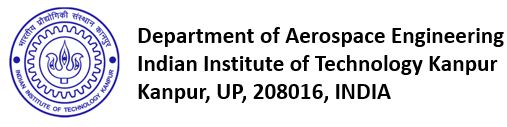

#                               Physics Informed Neural Network Using Nvidia Modulus for NACA 4412

**Name: HARISH WATHORE
<br>
Roll Number: 20101017
<br>**

# 1 Introduction

In the field of aerodynamics and computational fluid dynamics (CFD), finding precise and effective ways to model the behaviour of airfoils is an ongoing task. Aerodynamic analysis uses the NACA 4412 airfoil as a reference because it is a profile that is extensively researched and used. A state-of-the-art method for improving simulation accuracy and computational efficiency is the use of Physics-Informed Neural Networks (PINN). With the help of Nvidia Modulus, a platform made for high-performance scientific computing, this combination has the potential to significantly improve our comprehension of complex fluid dynamics.

PINN uses neural networks to learn and approximate the underlying physics of fluid flow, combining the advantages of artificial intelligence with conventional numerical methods. In areas where data may be expensive or scarce, PINN allows for accurate prediction by implementing established physical laws as constraints during training. The addition of Nvidia Modulus boosts processing power even more and makes it possible to parallelize complicated simulations with ease.

This synergy between PINN and Nvidia Modulus holds the potential to revolutionize the simulation landscape for airfoil studies. As we celebrate the 1-year anniversary of this innovative collaboration, it marks a significant milestone in the ongoing quest for more accurate, efficient, and scalable solutions in the field of aerodynamics. In this paper, we explore the nuances of using PINN for the NACA 4412 airfoil and demonstrate the benefits provided by Nvidia Modulus's computational power.

# 1.1 PDE and Losses

The physics of fluid is governed by the incompressible navier stokes equation. The continiuty and momentum equations are given as follows:

\begin{split}\begin{aligned}
\frac{\partial u}{\partial x} + \frac{\partial v}{\partial y} &= 0\\
u\frac{\partial u}{\partial x} + v\frac{\partial u}{\partial y} &= -\frac{\partial p}{\partial x} + \nu \left(\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)\\
u\frac{\partial v}{\partial x} + v\frac{\partial v}{\partial y} &= -\frac{\partial p}{\partial y} + \nu \left(\frac{\partial^2 v}{\partial x^2} + \frac{\partial^2 v}{\partial y^2} \right)\end{aligned}\end{split}

Loss functions are soft constraints and are given as follows:


$$
L_b = L_{\text{bc}} + L_{\text{physics}}\quad (7)
$$
$$
L_{\text{bc}} = \frac{1}{N} \sum_{i=1}^{N} \left((|u_{\text{b}} - \hat{u}_b|)^2 + (|p_{\text{b}} - \hat{p}_b|)^2\right)\quad (9)
$$
$$
L_{\text{physics}} = \frac{1}{N} \sum_{i=1}^{N} \left\lVert (\mathbf{v}_i \cdot \nabla) \mathbf{v}_i +\frac{1}{\rho} \nabla p_i + \nu \nabla^2 \mathbf{v}_i \right\rVert^2\quad (10)
$$


Nvidia Modulus has a navier stokes function where you set the value of nu and rho of your choice. Here rho = 1

# 2. NEURAL NETWORK NODE

The Architecture has :-                                                                                                                 
1.Hidden Layers : 6                                                                                                               
2.No.of Neurons Per Layer : 512                                                                                                                    
3.Activation Function : Swish                                                                                                    
4.Weight Normalization

# 3. Using Hydra to Configure Modulus Using Hydra to Configure Modulus


Defaults :
  - arch:
      - fully_connected (Neural Network)
  - scheduler: tf_exponential_lr
  - optimizer: adam
  - loss: sum (sum of square)


Scheduler:
 - decay_rate: 0.95                                                                                                                  
 - decay_steps: 2000

Training:                                                                                                                                         
 - rec_results_freq : 1000 (Just for making checkpoints and saving data )                                                               
 - rec_constraint_freq: 10000 (Just for making checkpoints and saving data )                                                         
 - max_steps : 100000 

Batch Size: No. of samples to work through before updating the internal model parameters.                                                                                                                         
 - inlet: 1280                                                                                                                       
 - outlet: 1280                                                                                                                      
 - walls: 1280                                                                                                                            
 - no_slip: 256                                                                                                                       
 - interior: 6400
  
 

# 4. Domain

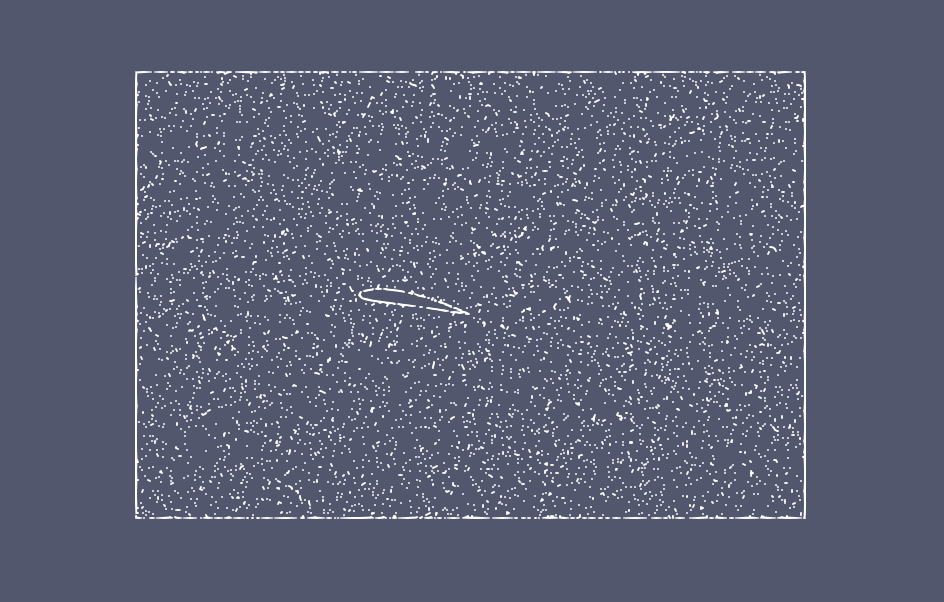

A rectangular domain of 60 x 40 $m^{2}$. Airfoil NACA 4412 at 10 degrees AOA is kept 20 m away from inlet and upper wall.                                                                                                                                                                                                                                                                                       

At Walls : $v = 0 \, \text{m/s}$

At Outlet : $dP= 0$

At Inlet : $u = 30 \, \text{m/s}$ & $v = 0 \, \text{m/s}$

At Airfoil (no slip) : $u = 0 \, \text{m/s}$ & $v = 0 \, \text{m/s}$


# 5. Loss Plots

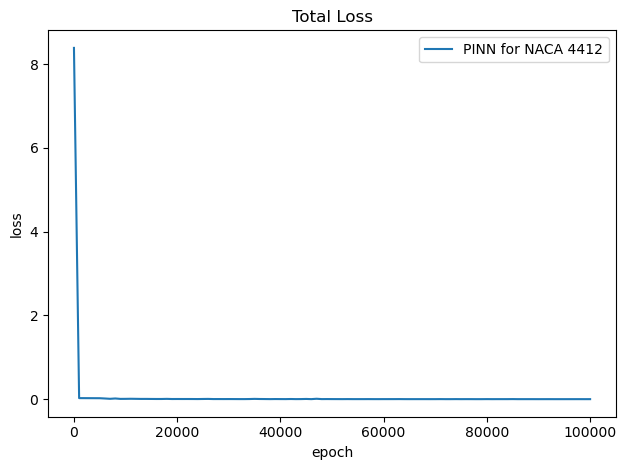

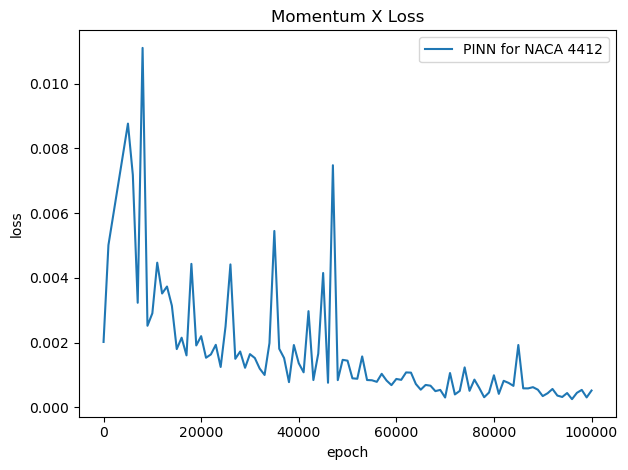

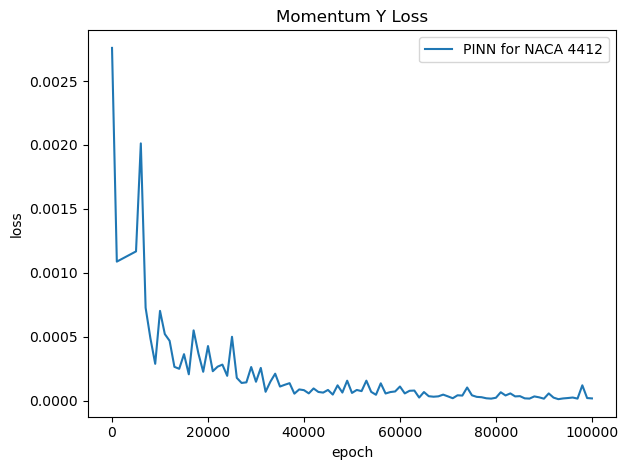

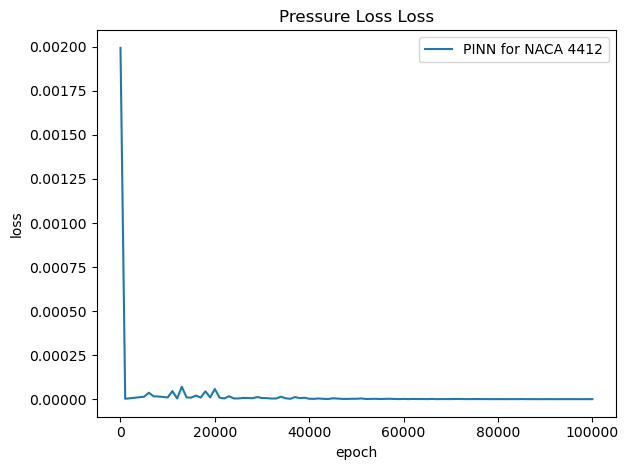

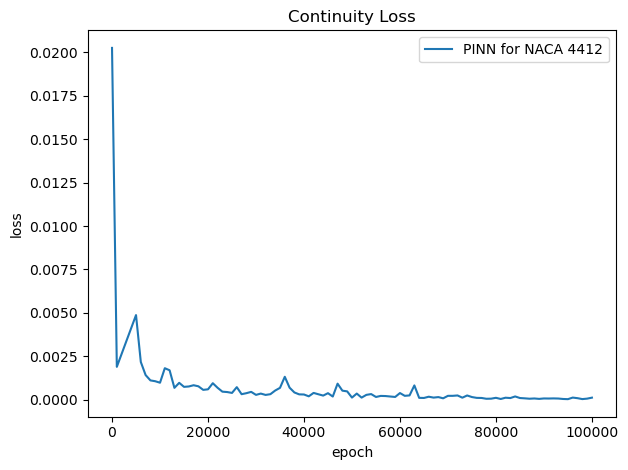

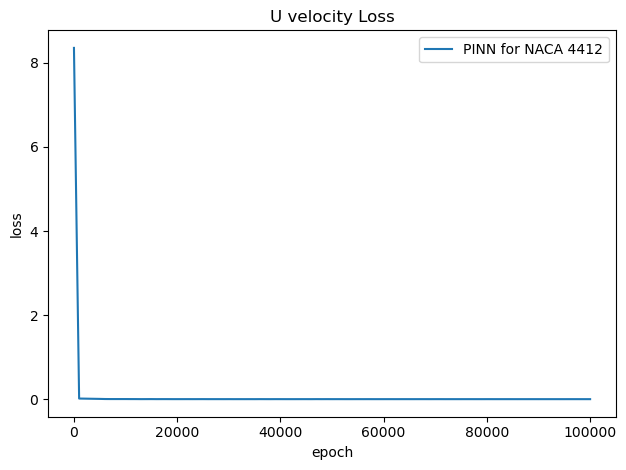

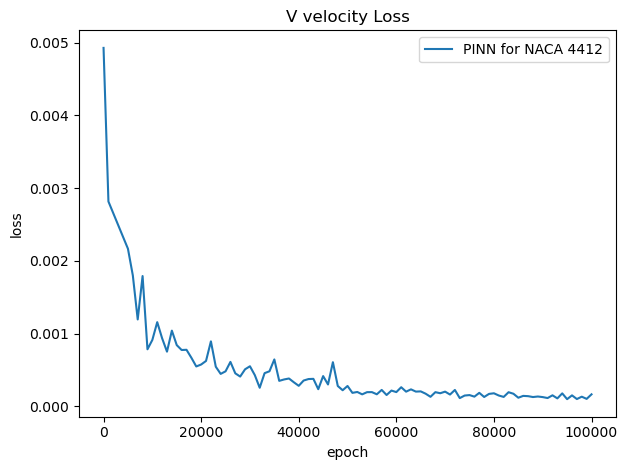

On the Boundaries Soft constraints are imposed by calculating loss by subtracting value predicted by node in the code and outvar which is the value of u, v velocity on the boundary we specify .

# 6. Outputs

# PRESSURE

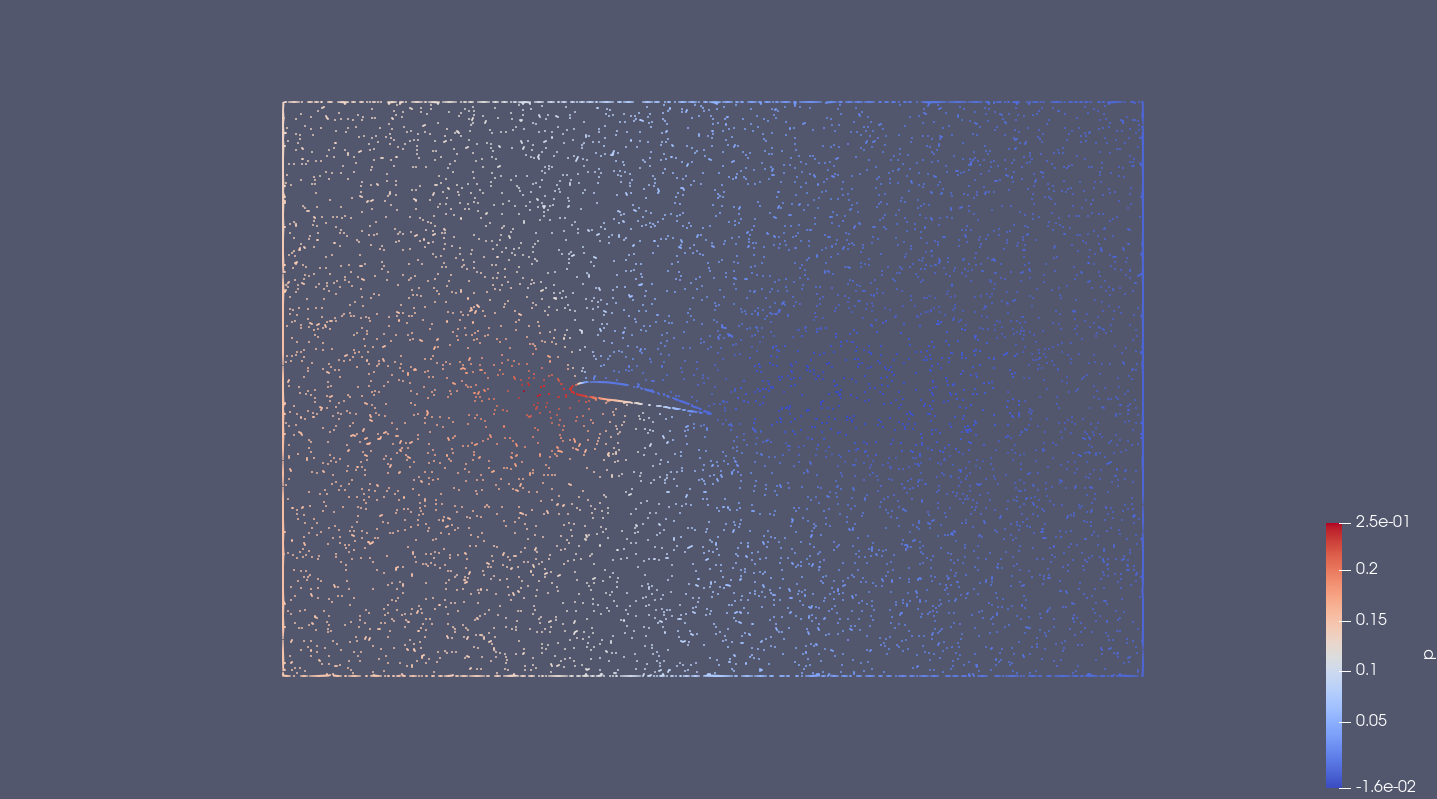

# U Velocity

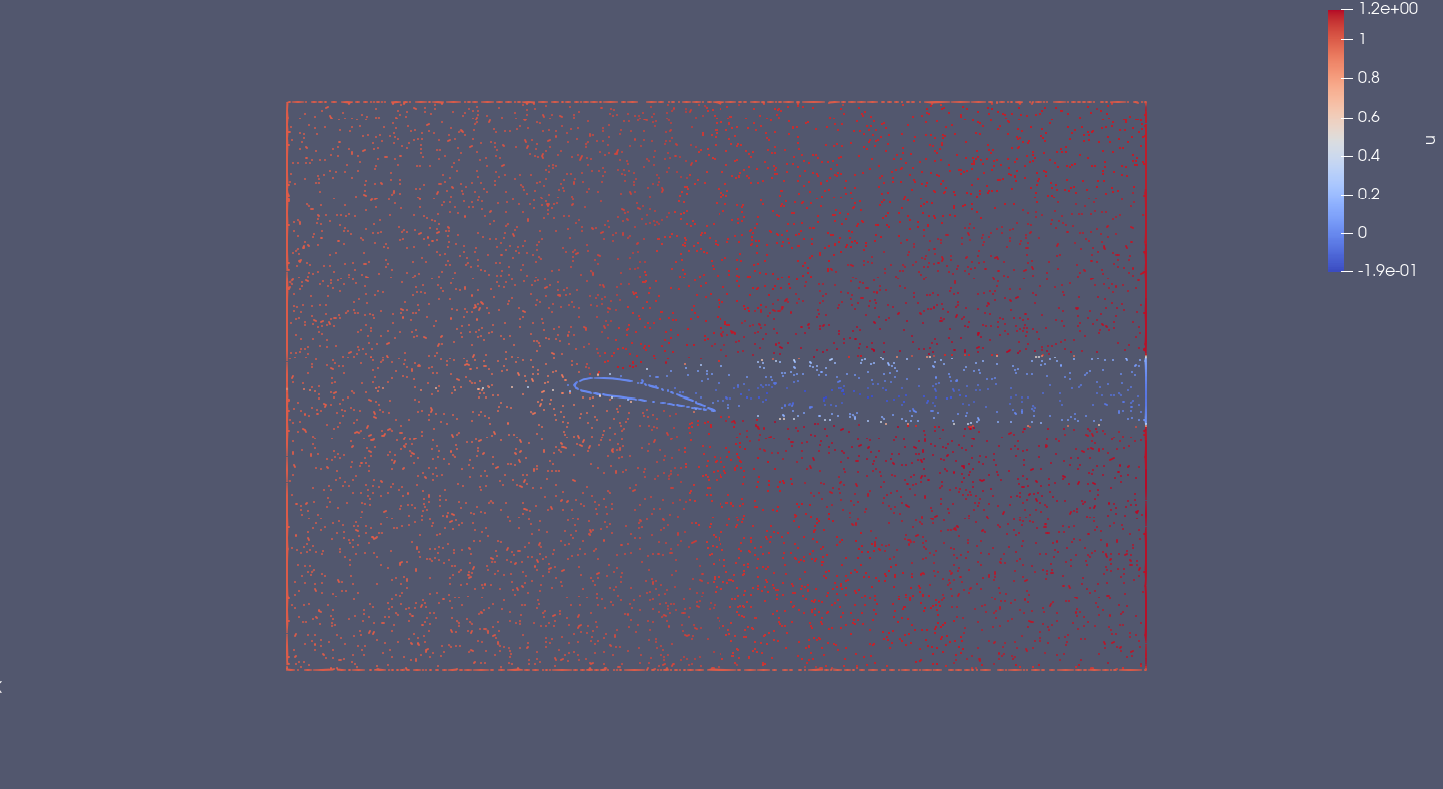

# V Velocity

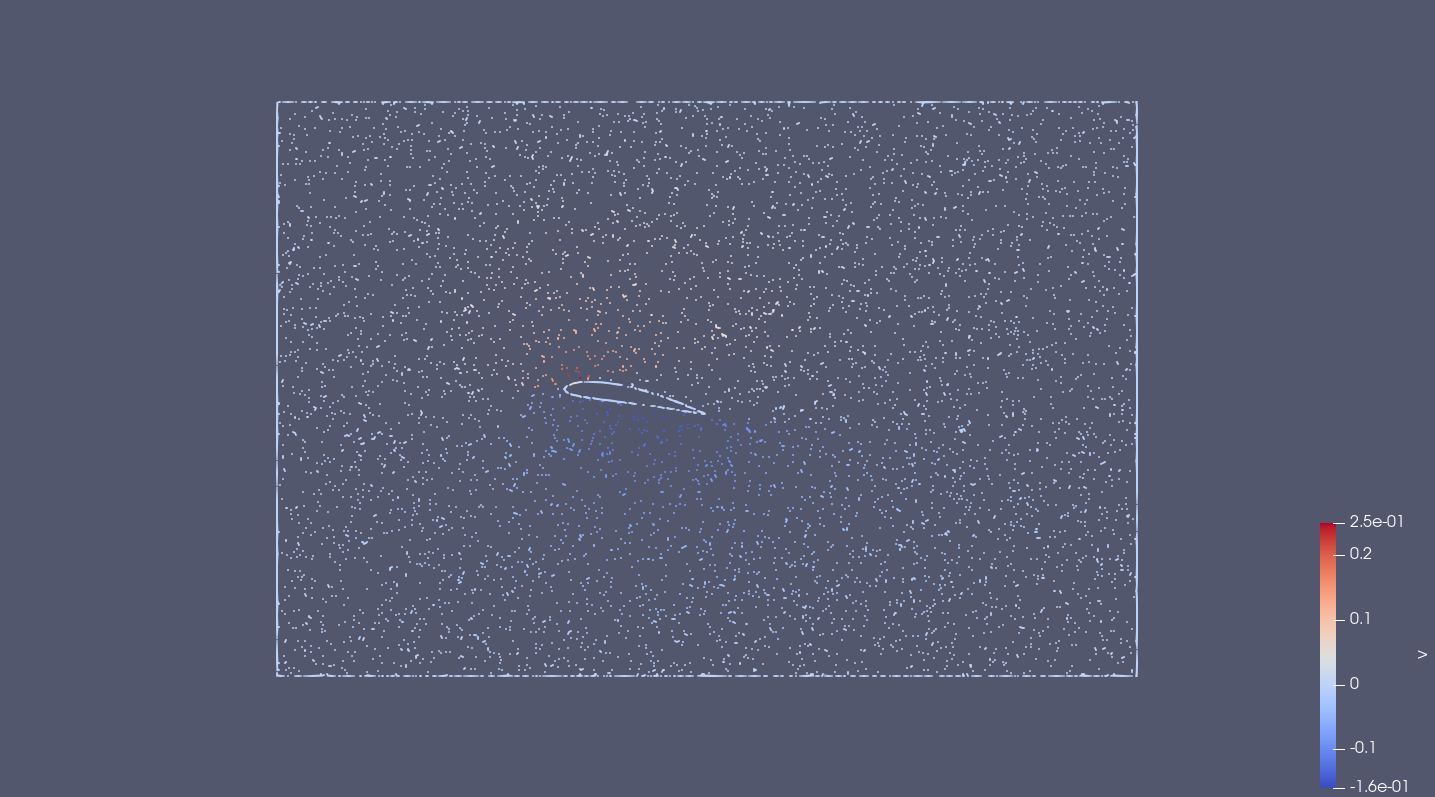